# Visualize for publication

In [1]:
import sys
sys.path.append("/media/hdd/viscent/SR-UNet")
from utils.inference_utils import *
import hiddenlayer as hl

In [2]:
dhcp_train_loader, dhcp_test_loader, dhcp_val_loader = get_dataloader('dhcp',100)
hcp_train_loader, hcp_test_loader, hcp_val_loader = get_dataloader('hcp',100)
brats_train_loader, brats_test_loader, brats_val_loader = get_dataloader('brats',100)

model_vae_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-dhcp.pth')
model_unet_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-dhcp-last.pth')
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp-last.pth')
model_unet_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-hcp.pth')
model_vae_dhcp.eval()
model_vae_hcp.eval()
model_unet_dhcp.eval()
model_unet_hcp.eval()

[08/16/22 23:39:05] INFO     colossalai - root - INFO: Creating dataset with 80 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 80

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 23:39:07] INFO     colossalai - root - INFO: Creating dataset with 20 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 20

  0%|          | 0/20 [00:00<?, ?it/s]

[08/16/22 23:39:08] INFO     colossalai - root - INFO: Creating dataset with 80 examples

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 23:39:09] INFO     colossalai - root - INFO: Creating dataset with 20 examples

  0%|          | 0/20 [00:00<?, ?it/s]

[08/16/22 23:39:10] INFO     colossalai - root - INFO: Creating dataset with 80 examples

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 23:39:11] INFO     colossalai - root - INFO: Creating dataset with 20 examples

  0%|          | 0/20 [00:00<?, ?it/s]

UNet3D(
  (encoders): ModuleList(
    (0): Encoder(
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 1, eps=1e-05, affine=True)
          (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        (SingleConv2): SingleConv(
          (groupnorm): GroupNorm(1, 8, eps=1e-05, affine=True)
          (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
      )
    )
    (1): Encoder(
      (pooling): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 16, eps=1e-05, affine=True)
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        

In [13]:
hl_graph = hl.build_graph(model_vae_dhcp, torch.zeros([1,1,160,160,160]).cuda())

/home/viscent/anaconda3/envs/bunet/lib/python3.10/site-packages/torch/nn/functional.py:2498: UserWarning:

__floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').

/home/viscent/anaconda3/envs/bunet/lib/python3.10/site-packages/torch/onnx/symbolic_helper.py:384: UserWarning:

You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mo

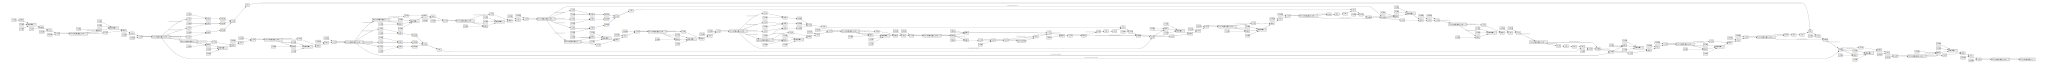

In [8]:
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph

In [14]:
hl_graph.save('bunet-arch.jpg')